# 1. Data Assembly 


In [ ]:
# Load dependencies
import numpy as np
import pandas as pd

In [ ]:
# Read in the wildfire data
wildfire_data = pd.read_csv('mapdataall.csv')

# Enforce latitude and longitude limits to remove incorrect data
wildfire_data = wildfire_data.loc[(wildfire_data['incident_longitude'] > -125) & 
                (wildfire_data['incident_longitude'] < -116) &
                (wildfire_data['incident_latitude'] > 32) &
                (wildfire_data['incident_latitude'] < 55)]

# Drop irrelevant columns
wildfire_data.drop(['incident_name', 'incident_is_final', 'incident_date_last_update', 
                    'incident_date_created', 'incident_administrative_unit', 'incident_administrative_unit_url',
                    'incident_location', 'incident_containment', 'incident_control',
                    'incident_cooperating_agencies', 'incident_type', 'incident_id',
                    'incident_url', 'incident_date_extinguished', 'is_active',
                    'calfire_incident', 'notification_desired'], axis=1, inplace=True)

# Convert date created to a date object
wildfire_data['incident_dateonly_created'] = pd.to_datetime(wildfire_data['incident_dateonly_created'])

# Add month and year columns
wildfire_data['month'] = wildfire_data['incident_dateonly_created'].dt.month
wildfire_data['year'] = wildfire_data['incident_dateonly_created'].dt.year
wildfire_data.drop(['incident_dateonly_created'], axis=1, inplace=True)

wildfire_data = wildfire_data.reset_index(drop=True)
wildfire_data['incident_dateonly_extinguished'] = pd.to_datetime(wildfire_data['incident_dateonly_extinguished'])
wildfire_data

,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_dateonly_extinguished,month,year
0,Shasta,37,-122.309000,40.774000,2018-01-09,10,2017
1,Inyo,406,-118.016510,36.602575,2013-02-28,2,2013
2,San Bernardino,30,-116.941311,34.288877,2013-04-22,4,2013
3,Madera,274,-119.635004,37.116295,2013-05-01,4,2013
4,Tehama,6965,-121.595555,40.190062,2013-05-09,5,2013
...,...,...,...,...,...,...,...
1704,Orange,12466,-117.657190,33.736140,2020-11-07,10,2020
1705,Placer,0,-120.488892,39.009454,2020-11-09,10,2020
1706,Orange,13964,-117.675067,33.877257,2020-11-07,10,2020
1707,"Riverside, San Bernardino",150,-117.514760,34.033430,NaT,11,2020


In [ ]:
wildfire_data.year.value_counts()


2017    426
2018    302
2019    262
2020    256
2016    153
2013    141
2015     96
2014     71
1969      2
Name: year, dtype: int64

In [ ]:
wildfire_data.incident_county.value_counts()


Riverside                148
San Diego                 88
San Luis Obispo           76
Butte                     67
Shasta                    62
                        ... 
Kern, Ventura              1
El Dorado, Sacramento      1
Mexico, San Diego          1
Glenn, Mendocino           1
El Dorado, Placer          1
Name: incident_county, Length: 88, dtype: int64

In [ ]:
# Read in the county data
county_data = pd.read_csv('ca_county_data.csv', engine='python', dtype={'County': 'str' })
county_data['Land Area(mi2)'] = county_data['Land Area(mi2)'].str.replace(',', '').astype(float)
county_data['Water Area(mi2)'] = county_data['Water Area(mi2)'].str.replace(',', '').astype(float)
county_data['Population(2010)'] = county_data['Population(2010)'].str.replace(',', '').astype(float)
county_data['Total Area(mi2)'] = county_data['Total Area(mi2)'].str.replace(',', '').astype(float)


# Create another .csv file with only county, lat, long
# county_locations = county_data[['County', 'Latitude', 'Longitude']]

county_data.head()

,County,Population(2010),Land Area(mi2),Water Area(mi2),Total Area(mi2),Latitude,Longitude
0,Alameda,1510271.0,739.017,82.311,821.328,37.648081,-121.913304
1,Alpine,1175.0,738.332,4.848,743.180,38.617610,-119.798999
2,Amador,38091.0,594.583,11.373,605.956,38.443550,-120.653856
3,Butte,220000.0,1636.460,40.667,1677.130,39.665959,-121.601919
4,Calaveras,45578.0,1020.010,16.915,1036.930,38.187844,-120.555115


In [ ]:
county_data.shape

(58, 7)

In [ ]:
# Read in the weather data
weather_data = pd.read_csv('ca_weather_data.csv', skiprows=10)

# Convert date created to a date object
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Add month and year columns
weather_data['month'] = weather_data['Date'].dt.month
weather_data['year'] = weather_data['Date'].dt.year
weather_data.drop(['Date'], axis=1, inplace=True)

weather_data.head()

,County,Longitude,Latitude,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa),month,year
0,Alameda,-121.9133,37.6481,587.0,0.65,34.2,44.5,54.8,0.74,7.91,1.0,2013.0
1,Alameda,-121.9133,37.6481,587.0,0.55,36.1,47.9,59.8,0.72,10.33,2.0,2013.0
2,Alameda,-121.9133,37.6481,587.0,0.57,43.0,54.7,66.4,1.09,13.14,3.0,2013.0
3,Alameda,-121.9133,37.6481,587.0,0.93,46.8,59.8,72.8,1.77,18.90,4.0,2013.0
4,Alameda,-121.9133,37.6481,587.0,0.19,50.4,62.3,74.2,2.46,19.86,5.0,2013.0


In [ ]:
weather_data.year.value_counts()

2015.0    684
2014.0    684
2013.0    684
2019.0    684
2018.0    684
2017.0    684
2016.0    684
2020.0    570
Name: year, dtype: int64

In [ ]:
# join wildfire_data- incident_county with county_data- County

wf_county_df = wildfire_data.merge(county_data, how = "left", left_on = "incident_county", right_on = "County")
wf_county_df.drop(['County'], axis=1, inplace=True)
wf_county_df.drop(['Population(2010)'], axis=1, inplace=True)
wf_county_df.head()

,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_dateonly_extinguished,month,year,Land Area(mi2),Water Area(mi2),Total Area(mi2),Latitude,Longitude
0,Shasta,37,-122.309000,40.774000,2018-01-09,10,2017,3775.40,72.020,3847.42,40.760522,-122.043550
1,Inyo,406,-118.016510,36.602575,2013-02-28,2,2013,10180.88,46.026,10226.91,36.561977,-117.403927
2,San Bernardino,30,-116.941311,34.288877,2013-04-22,4,2013,20056.94,47.888,20104.83,34.857220,-116.181197
3,Madera,274,-119.635004,37.116295,2013-05-01,4,2013,2137.07,16.200,2153.27,37.210039,-119.749852
4,Tehama,6965,-121.595555,40.190062,2013-05-09,5,2013,2949.71,12.462,2962.17,40.126156,-122.232276


In [ ]:
# Merge all data (wildire, county, and weather) into a single dataframe
wf_county_weather_df = pd.merge(wf_county_df, weather_data,  how='left', left_on=['incident_county','month','year'], right_on = ['County','month','year'])
wf_county_weather_df.drop(['County'], axis=1, inplace=True)

wf_county_weather_df.head()


,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_dateonly_extinguished,month,year,Land Area(mi2),Water Area(mi2),Total Area(mi2),...,Longitude_x,Longitude_y,Latitude_y,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa)
0,Shasta,37,-122.309000,40.774000,2018-01-09,10,2017,3775.40,72.020,3847.42,...,-122.043550,-122.0435,40.7605,1657.0,0.87,48.8,63.9,79.1,5.60,29.13
1,Inyo,406,-118.016510,36.602575,2013-02-28,2,2013,10180.88,46.026,10226.91,...,-117.403927,-117.4039,36.5620,4957.0,0.04,29.2,42.2,55.1,2.17,11.51
2,San Bernardino,30,-116.941311,34.288877,2013-04-22,4,2013,20056.94,47.888,20104.83,...,-116.181197,-116.1812,34.8572,1939.0,0.00,55.1,68.7,82.4,8.92,34.08
3,Madera,274,-119.635004,37.116295,2013-05-01,4,2013,2137.07,16.200,2153.27,...,-119.749852,-119.7499,37.2100,1677.0,0.36,43.7,59.0,74.4,1.29,19.50
4,Tehama,6965,-121.595555,40.190062,2013-05-09,5,2013,2949.71,12.462,2962.17,...,-122.232276,-122.2323,40.1262,335.0,0.48,56.5,69.6,82.7,6.06,31.61


# 2. Using Decision Trees to Predict Risk

Our preliminary heuristic for county level risk will be # of Acres burned. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

## 1st try: predicting acreage burned

In [ ]:
wf_county_weather_df.head()

,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_dateonly_extinguished,month,year,Land Area(mi2),Water Area(mi2),Total Area(mi2),Latitude_x,Longitude_x,Longitude_y,Latitude_y,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa)
0,Shasta,37,-122.309000,40.774000,2018-01-09,10,2017,3775.40,72.020,3847.42,40.760522,-122.043550,-122.0435,40.7605,1657.0,0.87,48.8,63.9,79.1,5.60,29.13
1,Inyo,406,-118.016510,36.602575,2013-02-28,2,2013,10180.88,46.026,10226.91,36.561977,-117.403927,-117.4039,36.5620,4957.0,0.04,29.2,42.2,55.1,2.17,11.51
2,San Bernardino,30,-116.941311,34.288877,2013-04-22,4,2013,20056.94,47.888,20104.83,34.857220,-116.181197,-116.1812,34.8572,1939.0,0.00,55.1,68.7,82.4,8.92,34.08
3,Madera,274,-119.635004,37.116295,2013-05-01,4,2013,2137.07,16.200,2153.27,37.210039,-119.749852,-119.7499,37.2100,1677.0,0.36,43.7,59.0,74.4,1.29,19.50
4,Tehama,6965,-121.595555,40.190062,2013-05-09,5,2013,2949.71,12.462,2962.17,40.126156,-122.232276,-122.2323,40.1262,335.0,0.48,56.5,69.6,82.7,6.06,31.61


In [ ]:
################################
#need to handle missing data better
wf_county_weather_df.dropna(axis = 0, inplace=True)

# Split up the data
X = wf_county_weather_df[['incident_county', 'month', 'year', 'Land Area(mi2)', 'Water Area(mi2)',
                            'Total Area(mi2)', 'Elevation (ft)', 'ppt (inches)', 'tmin (degrees F)',
                            'tmean (degrees F)', 'tmax (degrees F)', 'vpdmin (hPa)', 'vpdmax (hPa)',
                            'incident_longitude', 'incident_latitude']]

y = wf_county_weather_df['incident_acres_burned']

#################################
# need to handle categorical indident counties better. This was just a test for regressor 
X.drop(['incident_county'], axis = 1, inplace=True)

X.head()

/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,month,year,Land Area(mi2),Water Area(mi2),Total Area(mi2),Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa),incident_longitude,incident_latitude
0,10,2017,3775.40,72.020,3847.42,1657.0,0.87,48.8,63.9,79.1,5.60,29.13,-122.309000,40.774000
1,2,2013,10180.88,46.026,10226.91,4957.0,0.04,29.2,42.2,55.1,2.17,11.51,-118.016510,36.602575
2,4,2013,20056.94,47.888,20104.83,1939.0,0.00,55.1,68.7,82.4,8.92,34.08,-116.941311,34.288877
3,4,2013,2137.07,16.200,2153.27,1677.0,0.36,43.7,59.0,74.4,1.29,19.50,-119.635004,37.116295
4,5,2013,2949.71,12.462,2962.17,335.0,0.48,56.5,69.6,82.7,6.06,31.61,-121.595555,40.190062


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
depths = list(range(1,21))

def tree_regress(X_train, y_train, X_test, y_test, depths):
   
    train_scores = []
    test_scores = []

    # Loop through each tree depth
    for i in depths:
        # Fit decision tree classifier
        dtree = DecisionTreeRegressor(max_depth=i, random_state = 49)
        
        # Fit on train and calculate/store train score
        dtree.fit(X_train, y_train)
        this_train_score = dtree.score(X_train, y_train)
        train_scores.append(this_train_score)

        test_score = dtree.score(X_test, y_test)
        test_scores.append(test_score)
  
    return train_scores, test_scores

In [ ]:
train_scores, test_scores= tree_regress(X_train, y_train, X_test, y_test, depths)

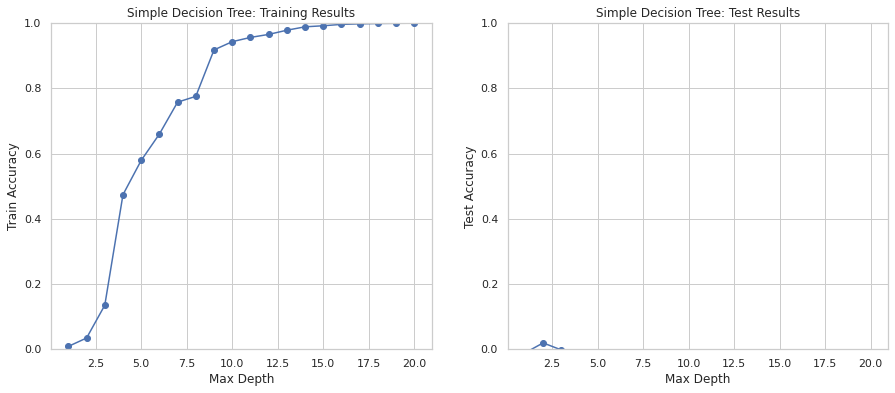

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 6))
plt.title("Train and Test Accuracies for Decision Tree Regressor Predicting Acreage Burned")

ax1.set_ylabel("Train Accuracy")
ax1.set_xlabel("Max Depth")
ax1.set_title('Simple Decision Tree: Training Results')
ax1.plot(depths, train_scores, 'b-', marker='o', label = 'Training Scores')
ax1.set_ylim(0,1)

ax2.set_ylabel("Test Accuracy")
ax2.set_xlabel("Max Depth")
ax2.set_title('Simple Decision Tree: Test Results')
ax2.plot(depths, test_scores, 'b-', marker='o', label = 'Test Scores')
ax2.set_ylim(0, 1)
plt.show()

This is not good. :( 

In [ ]:
# Fit a random forest model to the data
tree_depth = 5
num_trees = 55
random_forest = RandomForestRegressor(max_depth=tree_depth, n_estimators=num_trees, max_features = "sqrt")

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Evaluate accuracy on test set and assign it variable name `random_forest_test_score`

# Make predictions on the training and test set 
rf_pred_train = random_forest.score(X_train, y_train)
rf_pred_test = random_forest.score(X_test, y_test)
print("The test R^2 score of the random forest model was", round(rf_pred_test, 4))
print("The training R^2 score of the random forest model was", round(rf_pred_train, 4))

The test R^2 score of the random forest model was -0.0101
The training R^2 score of the random forest model was 0.435


Still not good :( 
    
Let's work on getting a better metric to predict.

# 2nd try: calculating risk

- aggregating values ---> predicting the # of acres burned in county per month/year 
- making it categorical

In [ ]:
wf_data_acres = wf_county_weather_df.groupby(['incident_county', 'month', 'year'], as_index=False)['incident_acres_burned'].sum()

In [ ]:
wf_data_acres.describe()

,month,year,incident_acres_burned
count,886.000000,886.000000,886.000000
mean,7.413093,2016.968397,3912.681716
std,1.883262,2.110805,16087.508541
min,1.000000,2013.000000,0.000000
25%,6.000000,2016.000000,60.250000
50%,7.000000,2017.000000,194.000000
75%,9.000000,2019.000000,1098.000000
max,12.000000,2020.000000,258384.000000


In [ ]:
five_cutoffs = [0]
cutoffs = [20, 40, 60, 80, 100]
for c in cutoffs: 
    val = np.percentile(wf_data_acres['incident_acres_burned'].to_list(), c)
    five_cutoffs.append(val)

In [ ]:
# bin 1: 0-50
# bin 2: 50-125
# bin 3: 125-360
# bin 4: 360-1950
# bin 5: >1950
five_cutoffs

[0, 50.0, 125.0, 360.0, 1952.0, 258384.0]

In [ ]:
bins = five_cutoffs
labels = [1,2,3,4,5]
wf_data_acres['binned_acres_burned'] = pd.cut(wf_data_acres['incident_acres_burned'], bins=bins, labels=labels)
wf_data_acres.head()


,incident_county,month,year,incident_acres_burned,binned_acres_burned
0,Alameda,5,2018,496,4
1,Alameda,6,2013,240,3
2,Alameda,6,2016,211,3
3,Alameda,6,2018,20,1
4,Alameda,6,2019,30,1


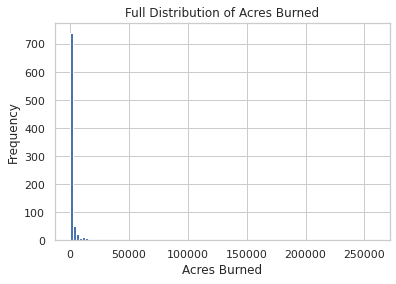

In [ ]:
wf_data_acres['incident_acres_burned'].hist(bins = 100)
plt.title("Full Distribution of Acres Burned")
plt.xlabel("Acres Burned")
plt.ylabel("Frequency")
plt.show()

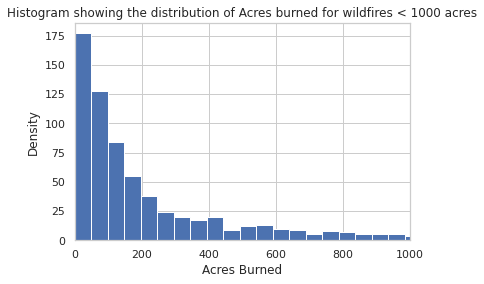

In [ ]:
total_acres = wf_data_acres['incident_acres_burned']
total_acres[total_acres<5000].hist(bins=100)
plt.title("Histogram showing the distribution of Acres burned for wildfires < 1000 acres")
plt.xlabel("Acres Burned")
plt.ylabel("Density")
plt.xlim(0,1000)
plt.show()

In [ ]:
wf_data = wf_data_acres.drop(['incident_acres_burned'], axis = 1)
wf_data.head()

,incident_county,month,year,binned_acres_burned
0,Alameda,5,2018,4
1,Alameda,6,2013,3
2,Alameda,6,2016,3
3,Alameda,6,2018,1
4,Alameda,6,2019,1


In [ ]:
depths = list(range(1, 21))

def tree_classifier_method(X_train, y_train, X_test, y_test, depths):
    
    train_scores = []
    test_scores = []

    # Loop through each tree depth
    for i in depths:
        # Fit decision tree classifier
        dtree = DecisionTreeClassifier(max_depth=i, random_state = 49)
        
        # Fit on train and calculate/store train score
        dtree.fit(X_train, y_train)
        this_train_score = dtree.score(X_train, y_train)
        train_scores.append(this_train_score)

        test_score = dtree.score(X_test, y_test)
        test_scores.append(test_score)

    # end of your code here
    return train_scores, test_scores

In [ ]:
################################### handle missing values better?
wf_data.dropna(axis = 0, inplace=True)
X = wf_data.drop(['binned_acres_burned'], axis = 1)

################################# handle counties better? 
X.incident_county = X.incident_county.astype("category").cat.codes
y = wf_data['binned_acres_burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)

train_scores, test_scores = tree_classifier_method(X_train, y_train, X_test, y_test, depths)

(698, 3) (175, 3)


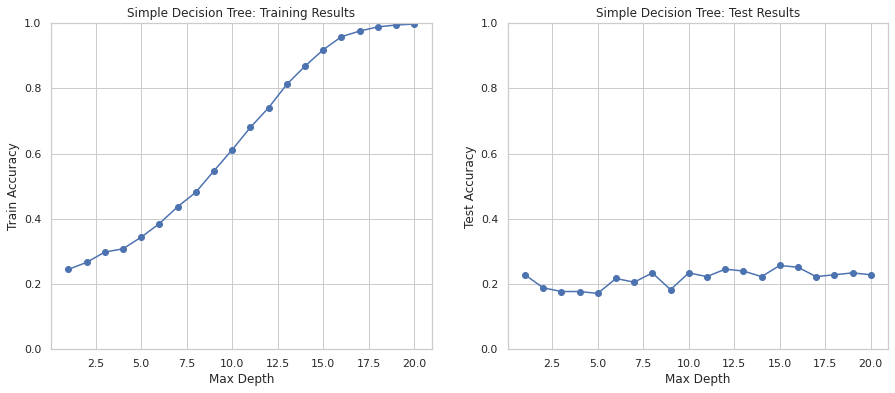

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 6))
plt.title("Train and Test Accuracies for Decision Tree Regressor Predicting Burned Acreage classification")

ax1.set_ylabel("Train Accuracy")
ax1.set_xlabel("Max Depth")
ax1.set_title('Simple Decision Tree: Training Results')
ax1.plot(depths, train_scores, 'b-', marker='o', label = 'Training Scores')
ax1.set_ylim(0,1)

ax2.set_ylabel("Test Accuracy")
ax2.set_xlabel("Max Depth")
ax2.set_title('Simple Decision Tree: Test Results')
ax2.plot(depths, test_scores, 'b-', marker='o', label = 'Test Scores')
ax2.set_ylim(0, 1)
plt.show()

Random chance is 0.2.

In [ ]:
X_train.head()

,incident_county,month,year
554,34,6,2016
406,25,10,2013
776,48,6,2014
319,19,8,2018
333,20,9,2016


In [ ]:
# FOR SUNDAY: 

# join wf_data with other county demographic/weather data
# take care of missing values in df, handle counties better? 
# ensemble methods?
# california heat map! county-based



# NOTES FROM MEDIUM ARTICLE : 
# --- maybe use the US classification binning system- "A-G" || implemented below
# try SMOTE to weight classes in order to boost accuracy of less represented class


## Using a Nationally Recognized Binning Approach

The National Wildfire Coordingating Group Classifies the size of fires as the following: 

* Class A - one-fourth acre or less;
* Class B - more than one-fourth acre, but less than 10 acres;
* Class C - 10 acres or more, but less than 100 acres;
* Class D - 100 acres or more, but less than 300 acres;
* Class E - 300 acres or more, but less than 1,000 acres;
* Class F - 1,000 acres or more, but less than 5,000 acres;
* Class G - 5,000 acres or more.

In [ ]:
nwcg_classes = [-1, 0.25, 10, 100, 300, 1000, 5000, 258384.0]
labels = list(range(1,8)) #A -> 1, B->2 , etc.
wf_data_acres['nwcg_class'] = pd.cut(wf_data_acres['incident_acres_burned'], bins=nwcg_classes, labels=labels)
wf_data_acres.head()


,incident_county,month,year,incident_acres_burned,binned_acres_burned,nwcg_class
0,Alameda,5,2018,496,4,5
1,Alameda,6,2013,240,3,4
2,Alameda,6,2016,211,3,4
3,Alameda,6,2018,20,1,3
4,Alameda,6,2019,30,1,3


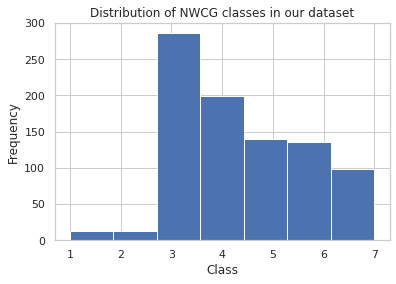

In [ ]:
# visualize the distribution of nwcg_classes in our dataset
wf_data_acres.nwcg_class.hist(bins = 7)
plt.title("Distribution of NWCG classes in our dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

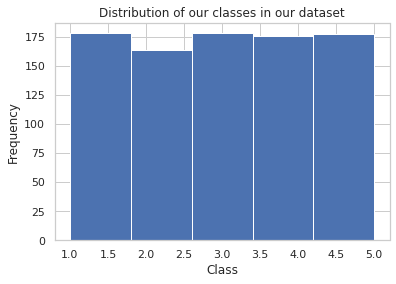

In [ ]:
# visualize the distribution of our handmade bins in our dataset
wf_data_acres.binned_acres_burned.hist(bins = 5)
plt.title("Distribution of our classes in our dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# as expected

In [ ]:

wf_county_weather_df.head()

,incident_county,incident_acres_burned,incident_longitude,incident_latitude,incident_dateonly_extinguished,month,year,Land Area(mi2),Water Area(mi2),Total Area(mi2),Latitude_x,Longitude_x,Longitude_y,Latitude_y,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa)
0,Shasta,37,-122.309000,40.774000,2018-01-09,10,2017,3775.40,72.020,3847.42,40.760522,-122.043550,-122.0435,40.7605,1657.0,0.87,48.8,63.9,79.1,5.60,29.13
1,Inyo,406,-118.016510,36.602575,2013-02-28,2,2013,10180.88,46.026,10226.91,36.561977,-117.403927,-117.4039,36.5620,4957.0,0.04,29.2,42.2,55.1,2.17,11.51
2,San Bernardino,30,-116.941311,34.288877,2013-04-22,4,2013,20056.94,47.888,20104.83,34.857220,-116.181197,-116.1812,34.8572,1939.0,0.00,55.1,68.7,82.4,8.92,34.08
3,Madera,274,-119.635004,37.116295,2013-05-01,4,2013,2137.07,16.200,2153.27,37.210039,-119.749852,-119.7499,37.2100,1677.0,0.36,43.7,59.0,74.4,1.29,19.50
4,Tehama,6965,-121.595555,40.190062,2013-05-09,5,2013,2949.71,12.462,2962.17,40.126156,-122.232276,-122.2323,40.1262,335.0,0.48,56.5,69.6,82.7,6.06,31.61


## Trying to add in lagged county-level fire data

In [ ]:
# Get agg metrics about counties - e.g. historical fire
# Do fires follow longitudinal trends? e.g. are some counties more susceptible to damage in subsequent years?
#test = wf_county_weather_df.groupby(['incident_county','year']).agg({'incident_acres_burned': 'sum', 'incident_acres_burned': 'count'})
yearly_acres_by_county = wf_county_weather_df.groupby(['incident_county','year'], as_index = False)['incident_acres_burned'].sum()
yearly_fires_by_county = wf_county_weather_df.groupby(['incident_county','year'], as_index = False)['incident_acres_burned'].count()
yearly_acres_by_county.rename(columns={'incident_acres_burned':'total_yearly_acres_burned'}, inplace=True)
yearly_fires_by_county.rename(columns={'incident_acres_burned':'number_of_fire_incidents_year'}, inplace=True)

yearly_acres_by_county.head()
yearly_fires_by_county.head()
# Rename these columns and join, can use as lagged predictor in addition to other information


,incident_county,year,number_of_fire_incidents_year
0,Alameda,2013,3
1,Alameda,2015,1
2,Alameda,2016,1
3,Alameda,2017,5
4,Alameda,2018,8


In [ ]:
weather_data.head()

,County,Longitude,Latitude,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa),month,year
0,Alameda,-121.9133,37.6481,587.0,0.65,34.2,44.5,54.8,0.74,7.91,1.0,2013.0
1,Alameda,-121.9133,37.6481,587.0,0.55,36.1,47.9,59.8,0.72,10.33,2.0,2013.0
2,Alameda,-121.9133,37.6481,587.0,0.57,43.0,54.7,66.4,1.09,13.14,3.0,2013.0
3,Alameda,-121.9133,37.6481,587.0,0.93,46.8,59.8,72.8,1.77,18.90,4.0,2013.0
4,Alameda,-121.9133,37.6481,587.0,0.19,50.4,62.3,74.2,2.46,19.86,5.0,2013.0


In [ ]:
# Join wf_data to lagged county data and other metrics from above
merge_1 = pd.merge(wf_data_acres, yearly_acres_by_county,  how='left', left_on=['incident_county','year'], right_on = ['incident_county','year'])
merge_2 = pd.merge(merge_1, yearly_fires_by_county,  how='left', left_on=['incident_county','year'], right_on = ['incident_county','year'])
merge_3 = pd.merge(merge_2, county_data,  how='left', left_on=['incident_county'], right_on = ['County'])
merge_3.drop(['County'], axis=1, inplace=True)
#merge_3.drop(['Population(2010)'], axis=1, inplace=True)
# Add in data on weather
merge_4 = pd.merge(merge_2, weather_data,  how='left', left_on=['incident_county', 'month', 'year'], right_on = ['County', 'month', 'year'])
merge_4.drop(['County'], axis=1, inplace=True)

wf_data_merged = merge_4
#wf_data_merged.head()

# Create lagged variable based on previous year county fire damage + number of fires
wf_data_merged['prev_year_fires'] = wf_data_merged.groupby('incident_county')['number_of_fire_incidents_year'].shift()
wf_data_merged['prev_year_acres_burned'] = wf_data_merged.groupby('incident_county')['total_yearly_acres_burned'].shift()

#wf_county_weather_df.drop(['County'], axis=1, inplace=True)

wf_data_merged.head()



,incident_county,month,year,incident_acres_burned,binned_acres_burned,nwcg_class,total_yearly_acres_burned,number_of_fire_incidents_year,Longitude,Latitude,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa),prev_year_fires,prev_year_acres_burned
0,Alameda,5,2018,496,4,5,1288,8,-121.9133,37.6481,587.0,0.00,49.5,60.0,70.6,1.46,14.66,NaN,NaN
1,Alameda,6,2013,240,3,4,328,3,-121.9133,37.6481,587.0,0.05,54.1,67.8,81.5,2.24,25.60,8.0,1288.0
2,Alameda,6,2016,211,3,4,211,1,-121.9133,37.6481,587.0,0.00,54.1,69.1,84.1,3.10,30.76,3.0,328.0
3,Alameda,6,2018,20,1,3,1288,8,-121.9133,37.6481,587.0,0.00,51.8,66.2,80.7,1.75,24.90,1.0,211.0
4,Alameda,6,2019,30,1,3,293,8,-121.9133,37.6481,587.0,0.00,54.3,68.6,82.9,2.29,26.27,8.0,1288.0


In [ ]:
# Try a model
wf_data_merged.dropna(axis = 0, inplace=True)
#X = wf_data_merged.drop(['binned_acres_burned', 'incident_county', 'total_yearly_acres_burned', 'number_of_fire_incidents_year', ''], axis = 1)
X = wf_data_merged[['month', 'ppt (inches)', 'tmean (degrees F)', 'vpdmax (hPa)', 'prev_year_acres_burned', 'prev_year_fires', 'Elevation (ft)']]
y = wf_data_merged['nwcg_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)

train_scores, test_scores = tree_classifier_method(X_train, y_train, X_test, y_test, depths)

(655, 7) (164, 7)


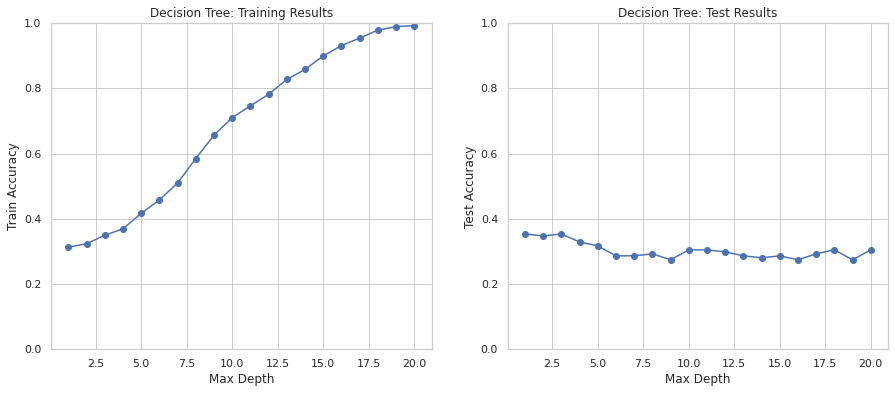

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 6))
plt.title("Train and Test Accuracies for Decision Tree Regressor Predicting Burned Acreage Classification from Select Predictors")

ax1.set_ylabel("Train Accuracy")
ax1.set_xlabel("Max Depth")
ax1.set_title('Decision Tree: Training Results')
ax1.plot(depths, train_scores, 'b-', marker='o', label = 'Training Scores')
ax1.set_ylim(0,1)

ax2.set_ylabel("Test Accuracy")
ax2.set_xlabel("Max Depth")
ax2.set_title('Decision Tree: Test Results')
ax2.plot(depths, test_scores, 'b-', marker='o', label = 'Test Scores')
ax2.set_ylim(0, 1)
plt.show()

# Ug it's still bad
# We should def try weighted

Comparing predicted labels vs. actual labels (initial unbalanced model): 


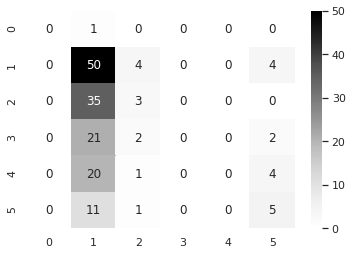

In [ ]:
# Create confusion matrix to get class accuracies
from sklearn.metrics import confusion_matrix

# Analyze best decision tree
best_dt_v1 = DecisionTreeClassifier(max_depth= 3)
best_dt_v1.fit(X_train, y_train)
y_pred_v1 = best_dt_v1.predict(X_test)
print( "Comparing predicted labels vs. actual labels (initial unbalanced model): ")
cf_matrix_v1 = confusion_matrix(y_test, y_pred_v1)

sns.heatmap(cf_matrix_v1, annot=True, cmap='Greys')
plt.show()

## Try some balancing

In [ ]:
!pip install imblearn==0.0

In [ ]:

# check version number
import imblearn
print(imblearn.__version__)
from collections import Counter 



0.7.0


In [ ]:
# summarize class distribution, use NWCG classes
from imblearn.over_sampling import SMOTE
counter = Counter(wf_data_acres.nwcg_class)
print(counter)

# transform the dataset using SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
y_smote = LabelEncoder().fit_transform(y_smote)


Counter({3: 286, 4: 199, 5: 140, 6: 136, 7: 99, 1: 13, 2: 13})


In [ ]:

plt.bar(months_num, freq)
plt.title("Job Request per month")
plt.xlabel("Months")
plt.ylabel("Frequency")
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)

plt.show()
plt.title("Distribution of NWCG classes in our dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

NameError: name 'months_num' is not defined

In [ ]:
# Balanced!
counter_smote = Counter(y_smote)
print(counter_smote)

Counter({2: 263, 1: 263, 3: 263, 4: 263, 0: 263, 5: 263})


In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# evaluate a model
def evaluate_model(X_smote, y_smote, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X_smote, y_smote, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the reference model
model = RandomForestClassifier(n_estimators=500)
# evaluate the model
scores = evaluate_model(X_smote, y_smote, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.597 (0.023)


In [ ]:
# try with stuff from above
# label encode the target variable
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=42)
print(X_train_smote.shape, X_test_smote.shape)

train_scores, test_scores = tree_classifier_method(X_train_smote, y_train_smote, X_test_smote, y_test_smote, depths)


(1262, 7) (316, 7)


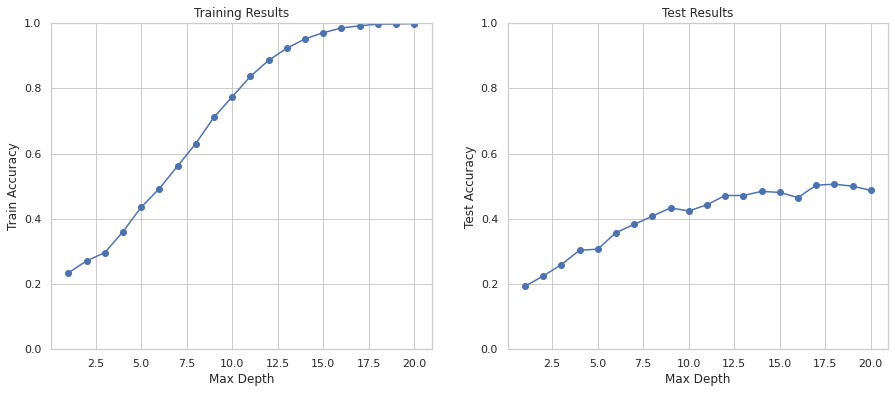

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 6))
plt.title("SMOTE & Random Forest Classification: Train and Test Accuracies")

ax1.set_ylabel("Train Accuracy")
ax1.set_xlabel("Max Depth")
ax1.set_title('Training Results')
ax1.plot(depths, train_scores, 'b-', marker='o', label = 'Training Scores')
ax1.set_ylim(0,1)

ax2.set_ylabel("Test Accuracy")
ax2.set_xlabel("Max Depth")
ax2.set_title('Test Results')
ax2.plot(depths, test_scores, 'b-', marker='o', label = 'Test Scores')
ax2.set_ylim(0, 1)
plt.show()

Comparing predicted labels vs. actual labels: SMOTE Model


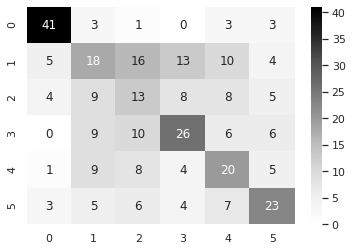

In [ ]:
from sklearn.metrics import confusion_matrix
random_seed = 112
# Analyze best decision tree
best_dt = DecisionTreeClassifier(max_depth= 11, random_state = random_seed)
best_dt.fit(X_train_smote, y_train_smote)
y_pred = best_dt.predict(X_test_smote)
print( "Comparing predicted labels vs. actual labels: SMOTE Model")
cf_matrix = confusion_matrix(y_test_smote, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Greys')
plt.show()

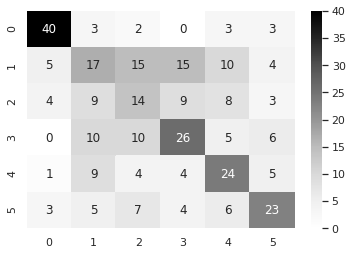

In [ ]:

recall = np.diag(cf_matrix) / np.sum(cf_matrix, axis = 1)
precision = np.diag(cf_matrix) / np.sum(cf_matrix, axis = 0)
print(recall)
print(precision)

[0.80392157 0.27272727 0.27659574 0.45614035 0.42553191 0.47916667]
[0.75925926 0.33962264 0.24074074 0.47272727 0.37037037 0.5       ]


In [ ]:
X_test_smote.head()

,month,ppt (inches),tmean (degrees F),vpdmax (hPa),prev_year_acres_burned,prev_year_fires,Elevation (ft)
1239,7,0.000000,82.723569,54.401243,559.286762,3.998154,1662.009231
813,8,0.000000,80.500000,39.330000,400.000000,1.000000,528.000000
1174,7,0.201272,79.098599,44.319765,18532.350187,6.721444,1089.961545
534,10,0.020000,68.400000,33.120000,13731.000000,7.000000,2119.000000
514,6,0.190000,67.400000,22.540000,1034.000000,12.000000,2119.000000


Promising! looks like the density is concentrated around the diagonal!

In [ ]:
# getting usable format for heatmap
# Show accuracy for individual classes
# We can make an argument about that -> in this case we want to prioritize the accuracy of the worst class over the accuracy
# Of the least severe class, could be the case that we're doign better forsome
# It's better to have greater accuracy for firest that could cause devastating damage

# Even if it's not predicting it accurately, it predicts it within an adjacent risk category



In [ ]:
wf_data_merged.head()

,incident_county,month,year,incident_acres_burned,binned_acres_burned,nwcg_class,total_yearly_acres_burned,number_of_fire_incidents_year,Longitude,Latitude,Elevation (ft),ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),vpdmin (hPa),vpdmax (hPa),prev_year_fires,prev_year_acres_burned
1,Alameda,6,2013,240,3,4,328,3,-121.9133,37.6481,587.0,0.05,54.1,67.8,81.5,2.24,25.60,8.0,1288.0
2,Alameda,6,2016,211,3,4,211,1,-121.9133,37.6481,587.0,0.00,54.1,69.1,84.1,3.10,30.76,3.0,328.0
3,Alameda,6,2018,20,1,3,1288,8,-121.9133,37.6481,587.0,0.00,51.8,66.2,80.7,1.75,24.90,1.0,211.0
4,Alameda,6,2019,30,1,3,293,8,-121.9133,37.6481,587.0,0.00,54.3,68.6,82.9,2.29,26.27,8.0,1288.0
5,Alameda,7,2013,88,2,3,328,3,-121.9133,37.6481,587.0,0.00,55.9,71.5,87.0,2.23,31.91,8.0,293.0


In [ ]:
def get_heatmap_data(month, year, fitted_model): 
    """ returns df of county and predicted risk category"""

    x = wf_data_merged[wf_data_merged["month"]== month]
    x = x[x["year"] == year]
    result = x[['incident_county', 'nwcg_class']]
    X = x[['month', 'ppt (inches)', 'tmean (degrees F)', 'vpdmax (hPa)', 'prev_year_acres_burned', 'prev_year_fires', 'Elevation (ft)']]
    y = fitted_model.predict(X)
    result['nwcg_class'] = y

    return result






In [ ]:
heatmap_9_19 = get_heatmap_data(9, 2019, best_dt)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:

heatmap_9_19.to_csv("/home/jovyan/work/heatmap_9_19.csv")

In [ ]:
!pip install graphviz==0.15

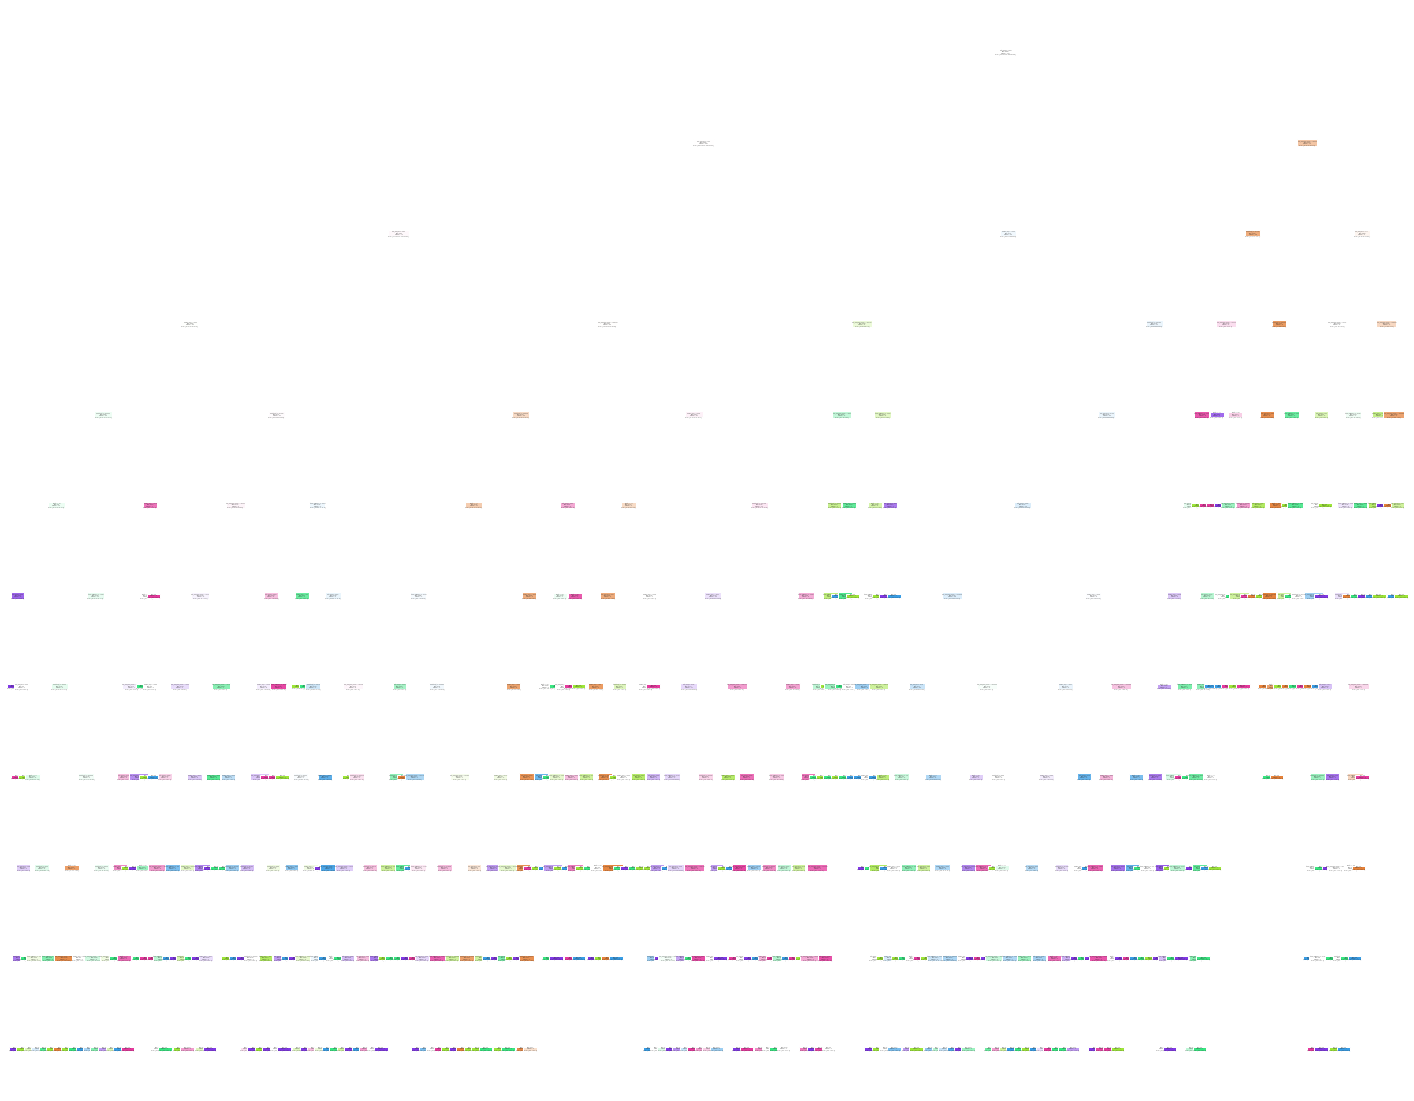

In [ ]:
# Fit a basic decision tree for interpretability
# Feature Importance & Splits for Understanding
import graphviz
from sklearn import tree
# DOT data

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_dt, feature_names=X_train.columns, filled=True)
# Full tree too big - look into feature importance


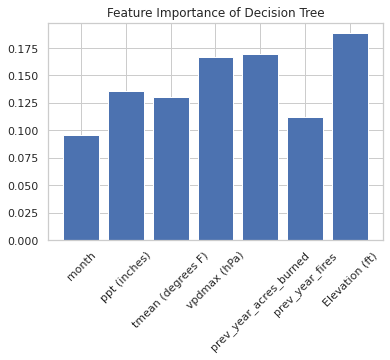

In [ ]:
# Plot feature importance

pyplot.bar(X_train.columns, best_dt.feature_importances_)
pyplot.title('Feature Importance of Decision Tree')
pyplot.xticks(rotation=45)
pyplot.show()